<a href="https://colab.research.google.com/github/anzorrio/MFTI_ML_EDU/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from IPython.display import clear_output

plt.rcParams.update({'font.size': 18})

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

# Загрузка данных

In [ ]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.dropna(inplace=True)

# Визуализации

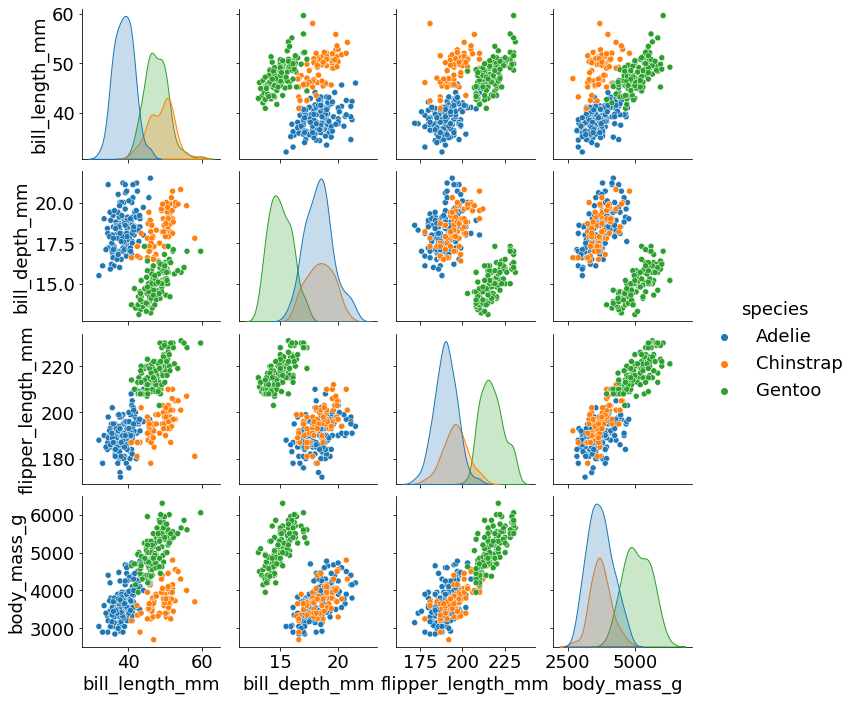

In [ ]:
sns.pairplot(df, hue="species")

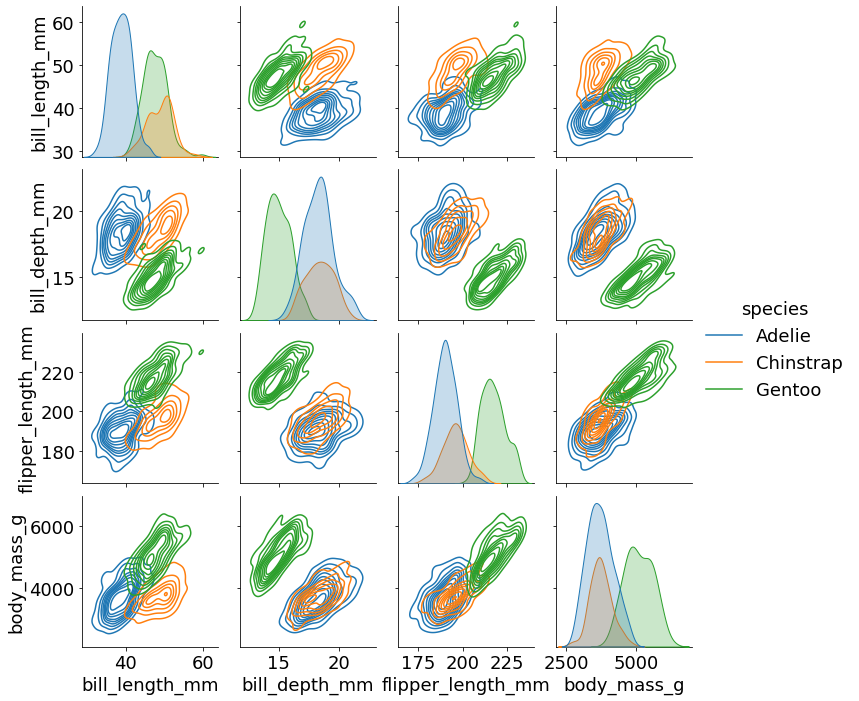

In [ ]:
sns.pairplot(df, hue="species", kind="kde")

In [ ]:
new_df = df[['flipper_length_mm', 'body_mass_g']]
new_df

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,NaN,NaN
4,193.0,3450.0
...,...,...
339,NaN,NaN
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


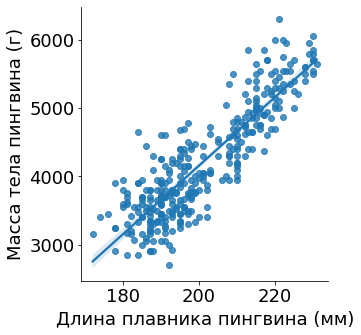

In [ ]:
g = sns.lmplot(data=new_df, x="flipper_length_mm", y="body_mass_g",height=5)
g.set_axis_labels("Длина плавника пингвина (мм)", "Масса тела пингвина (г)")

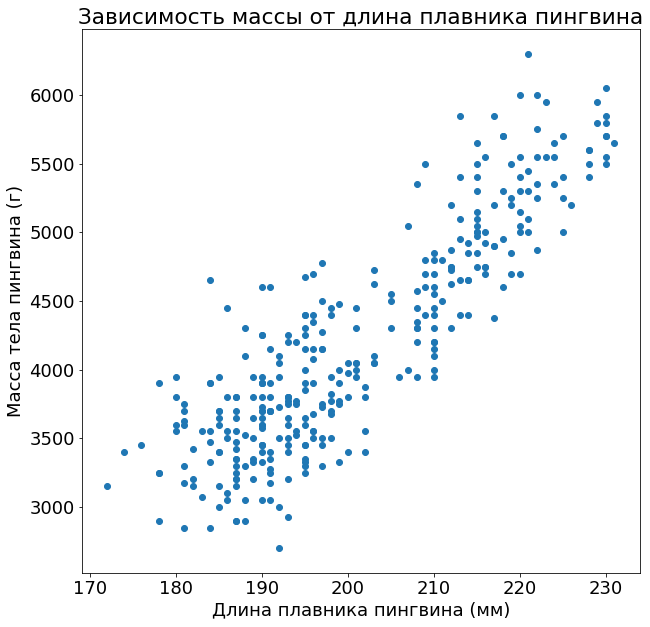

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Зависимость массы от длина плавника пингвина')
plt.xlabel('Длина плавника пингвина (мм)')
plt.ylabel('Масса тела пингвина (г)')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])

In [ ]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)
    plt.show()

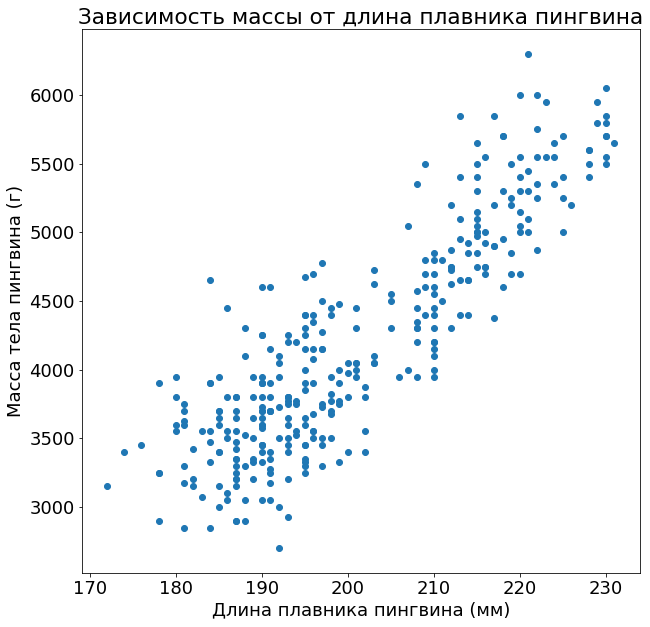

In [ ]:
plot_line_on_data(df['flipper_length_mm'], df['body_mass_g'], 'Длина плавника пингвина (мм)', 'Масса тела пингвина (г)', 'Зависимость массы от длина плавника пингвина')

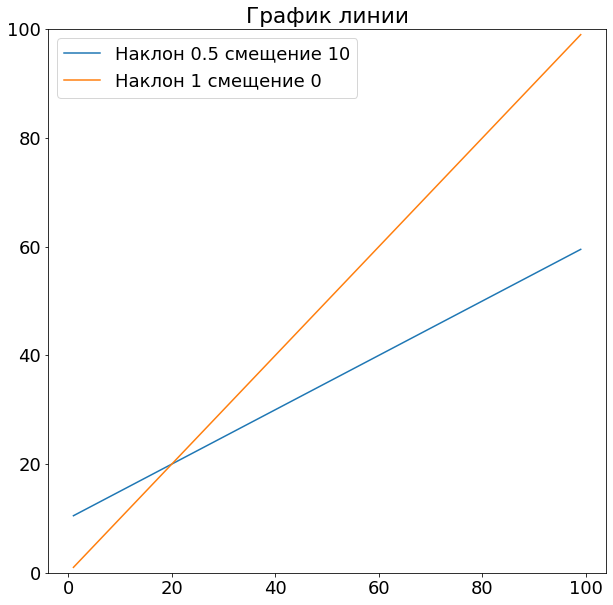

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

a = 0.5 # наклон
b = 10 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

a = 1 # наклон
b = 0 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

plt.legend()

Уравнение линии определяют 2 параметра, смещение и наклон. Мы определяем их как $a$ и $b$, но чаще их можно увидеть как $w_1$ и $w_0$.

Т.е. вместо $y = ax +b$ будет запись $y = w_0 + w_1 x$

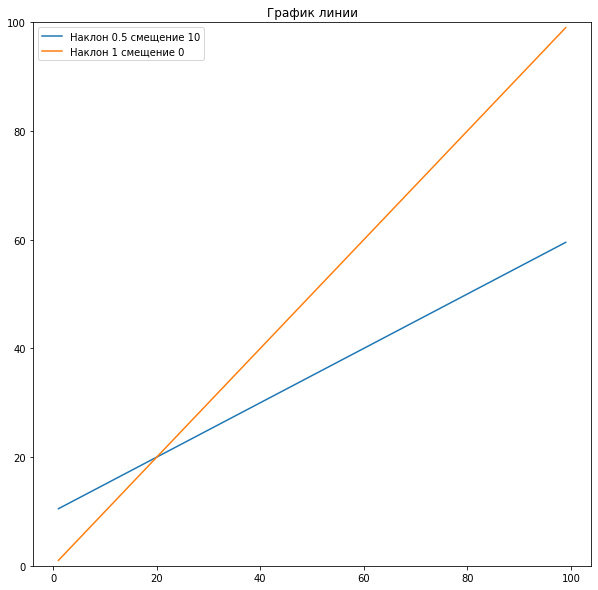

In [ ]:
# все тот же код, только название переменных поменялись
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

w1 = 0.5 # наклон
w0 = 10 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

w1 = 1 # наклон
w0 = 0 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

plt.legend()

Почему обозначение через $w$? Так проще задавать **веса** (параметры) нашей модели вне зависимости от количества входов.

Так в случае одного признака $[w_0, w_1]$ задаем $y = w_0 + w_1\cdot x$

В случае двух признаков $[w_0, w_1, w_2]$ - все аналогично, свободный член смещения и цифра, на которую мы домножаем каждую точку этого признака: $y = w_0 + w_1\cdot x_1 + w_2\cdot x_2$

In [ ]:
w1 = 1 # наклон вдоль x1
w2 = 1 # наклон вдоль x2
w0 = 0 # смещение

x1 = np.arange(1, 100) # данные на вход по первому признаку
x2 = np.arange(1, 100) # данные на вход по второму признаку

y = w0 + w1*x + w2*x # поэлементно умножаем на наклон каждый признак и поэлементно добавляем смещение (прогноз)


# это функции, которые создают координатную сетку
# это нужно только для красоты, чтоб нарисовать плоскость поверх точек
ww1, ww2 = np.meshgrid(x1, x2)
yy = w0 + ww1 + ww2

for angle in range(0,360):
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('График плоскости')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.plot_surface(ww1, ww2, yy, alpha=0.2)

    ax.scatter(x1, x2, y)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: ignored

Теперь построим линию поверх данных о пингвинах. Переопределим нашу старую функцию, визуализирующую только данные и добавим возможность строить $w_0 + w_1\cdot x$.

Для удобства будем подавать $w_0, w_1$ в виде списка (вектора) $[w_0, w_1]$

In [ ]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title, W):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)

    x = np.arange(min(data_x), max(data_x)) # данные для отрисовки линии
    y = W[0] + W[1]*x # поэлементно умножаем на наклон и поэлементно добавляем смещение
    plt.plot(x, y, label = f'Наклон {W[1]} смещение {W[0]}')
    plt.legend()
    plt.show()

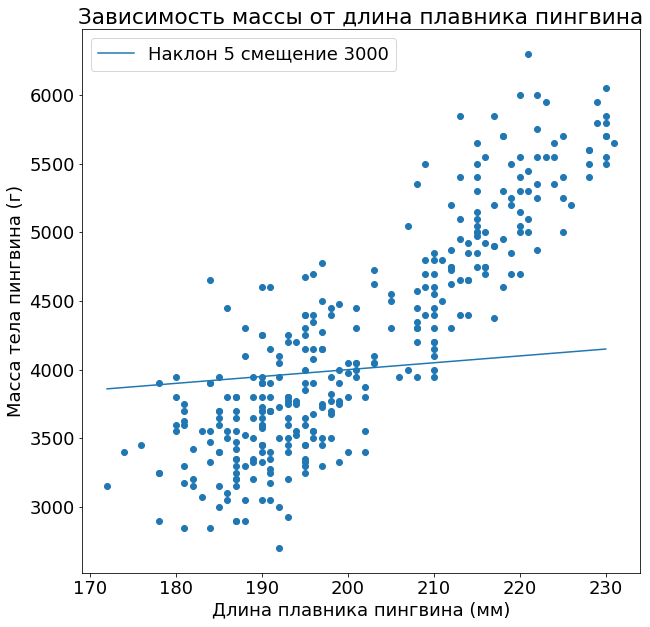

In [ ]:
plot_line_on_data(df['flipper_length_mm'],
                  df['body_mass_g'],
                  'Длина плавника пингвина (мм)',
                  'Масса тела пингвина (г)',
                  'Зависимость массы от длина плавника пингвина',
                  [3000, 5]) # коэффициенты наклона я прикинул на глаз, наша задача - найти их

# Градиентный спуск

## Постановка задачи

Постановка задачи:

Предполагается что между признаками (тут он один - длина плавника) и целевой переменной (масса тела) есть **линейная** зависимость. На практике признаков может быть больше, с каждым из них ищется линейная связь ($w_n \cdot x_n$)

Необходимо найти такие параметры линии $[w_0, \cdots , w_n]$ (у нас их 2 $[w_0, w_1]$), чтобы ошибка была минимальной.

Параметры мы изначально инициализируем случайными числами и затем итеративно, небольшими шагами (0.001), бдуем уменьшать их в сторону минимизации ошибки.

В зависимости от уравнения прямой ошибка (обозначим ее $J$) будет менятся - $J(W)$

Тогда шагом в минимизации ошибки будет следующее выражение:

$$W := W - \alpha \frac{d}{dW} J(W)$$

Тут
* $W$ - вектор искомых параметров $[w_0, \cdots , w_n]$
* $J(W)$ - ошибка
* Cимвол $:=$ означает, что значение на следующем шаге (слева) заменит выражение справа.
* Параметр $\alpha$ - некоторая константа, например 0.001, чтобы спуск происходил без резких скачков
* Производная (градиент, если параметров больше одного) $\frac{d}{dW}J(W)$ показывает в какую сторону ошибка $J(W)$  будет возрастать при небольшом изменении $dW$

## Случай одной переменной

4.5 20.25
4.05 16.4025
3.6449999999999996 13.286024999999997
3.2804999999999995 10.761680249999998
2.95245 8.716961002499998
2.657205 7.060738412024999
2.3914845 5.719198113740249
2.1523360499999997 4.632550472129601
1.9371024449999998 3.7523658824249773
1.7433922004999998 3.0394163647642314


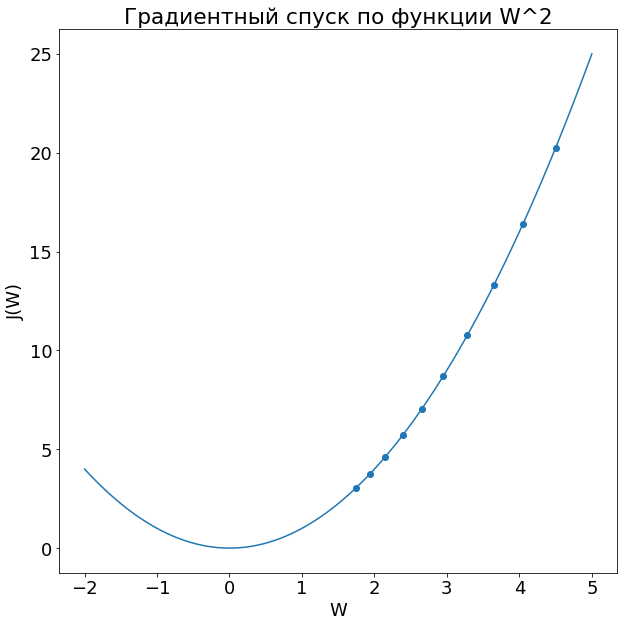

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Градиентный спуск по функции W^2')
plt.ylabel('J(W)')
plt.xlabel('W')

data = np.linspace(-2, 5, 100)

# построим сам график функции W^2
def w_sqared(data):
    return data**2

# находим значение производной в точке
def compute_deriv_w_sqared(point):
    return 2*point

# инициализируем случайным значеним
w = 5

# будем записывать значение w и соответсвую ему в точке ошибку
w_pos = []
error = []

for i in range(10):
    w = w - 0.05 * compute_deriv_w_sqared(w)
    print(w, w_sqared(w))
    w_pos.append(w)
    error.append(w_sqared(w))

plt.plot(data, w_sqared(data))
plt.scatter(w_pos, error)

In [ ]:
pd.DataFrame({'W':w_pos, 'd/dw':error})

,W,d/dw
0,4.000000,16.000000
1,3.200000,10.240000
2,2.560000,6.553600
3,2.048000,4.194304
4,1.638400,2.684355
5,1.310720,1.717987
6,1.048576,1.099512
7,0.838861,0.703687
8,0.671089,0.450360
9,0.536871,0.288230


Почему градиентный спуск использует производную функции потерь? Нахождение наклона функции потерь при нашем текущем значении $W$ говорит нам о двух вещах.

Во-первых, это направление для перемещения $W$. Когда мы смотрим на график функции, положительный наклон означает, что функция идет вверх при движении вправо, поэтому мы хотим двигаться влево, чтобы найти минимум. Аналогично, отрицательный наклон означает, что функция идет вниз вправо, поэтому мы хотим двигаться вправо, чтобы найти минимум.

Во-вторых, насколько большой шаг нужно сделать. Если наклон большой, мы хотим сделать большой шаг, потому что мы далеки от минимума. Если наклон небольшой, мы хотим сделать меньший шаг. Обратим внимание в приведенном выше примере, как градиентный спуск с каждой итерацией делает все меньшие шаги к минимуму.

Скорость спуска альфа была выбрана 0.1, она позволяет контролировать скорость спуска. Важно подобрать ее верно иначе:

-5.0 25.0
5.0 25.0
-5.0 25.0
5.0 25.0
-5.0 25.0
5.0 25.0
-5.0 25.0
5.0 25.0
-5.0 25.0
5.0 25.0


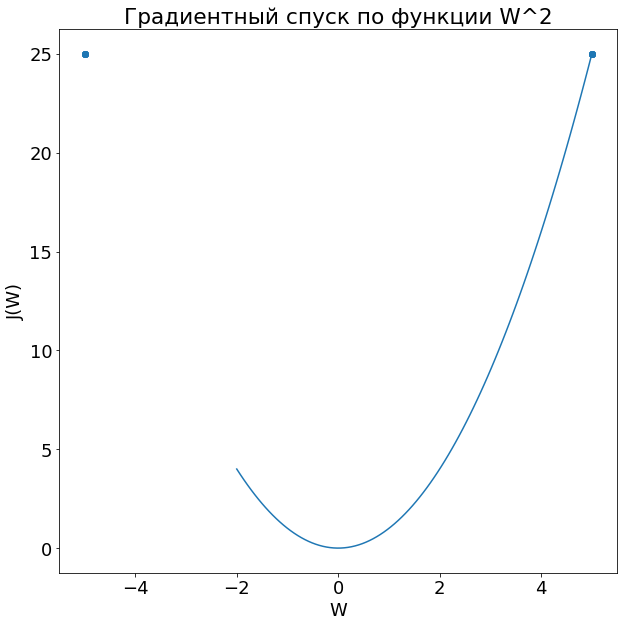

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Градиентный спуск по функции W^2')
plt.ylabel('J(W)')
plt.xlabel('W')
# инициализируем случайным значеним
w = 5

# будем записывать значение w и соответсвую ему в точке ошибку
w_pos = []
error = []

for i in range(10):
    w = w - 1. * compute_deriv_w_sqared(w)
    print(w, w_sqared(w))
    w_pos.append(w)
    error.append(w_sqared(w))

plt.plot(data, w_sqared(data))
plt.scatter(w_pos, error)

-2.0 4.0
0.7999999999999998 0.6399999999999997
-0.31999999999999984 0.1023999999999999
0.1279999999999999 0.01638399999999997
-0.05119999999999994 0.002621439999999994
0.02047999999999997 0.00041943039999999877
-0.008191999999999987 6.71088639999998e-05
0.0032767999999999946 1.0737418239999964e-05
-0.0013107199999999979 1.7179869183999945e-06
0.0005242879999999991 2.74877906943999e-07


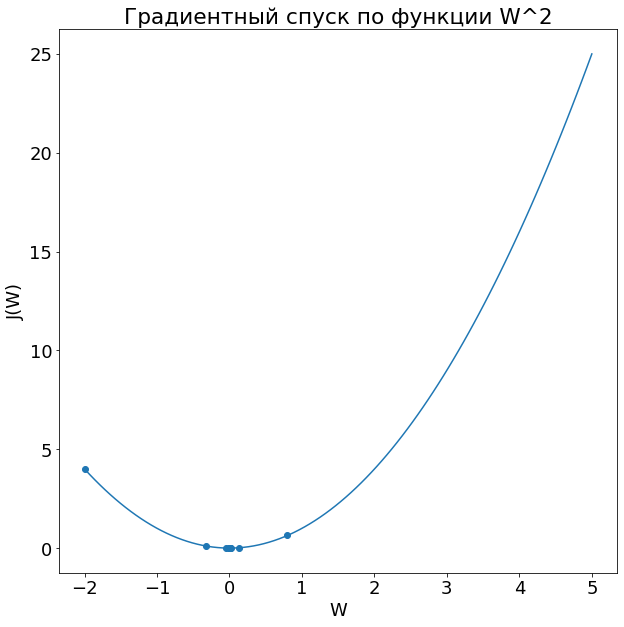

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Градиентный спуск по функции W^2')
plt.ylabel('J(W)')
plt.xlabel('W')
# инициализируем случайным значеним
w = 5

# будем записывать значение w и соответсвую ему в точке ошибку
w_pos = []
error = []

for i in range(10):
    w = w - 0.7 * compute_deriv_w_sqared(w)
    print(w, w_sqared(w))
    w_pos.append(w)
    error.append(w_sqared(w))

plt.plot(data, w_sqared(data))
plt.scatter(w_pos, error)

## Случай двух переменных

Что будет, если переменных больше? Рассмотрим простой пример, когда ошибка определяется так

$$J([w_1, w_2]) = w_1^2 + w_2^2$$

Тогда наша задача минимизировать функцию

$$min_{w_1, w_2}J(w_1, w_2)$$

Правила обновления $W_1$ предполагают использование частной производной от $J$ по отношению к $W_1$. Простыми словами это значит, что мы хотим понять, как изменения **только** $W_1$ влияют на нашу ошибку $J$. Это означает, что переменную $W_2$ мы будем полагать константой (в случае, если их было бы больше - все они были бы константами).

Градиент - вектор частных производных по параметрам. Грубо говоря список, каждый элемент которого (частная производная) говорит нам о направлении роста функции.

Градиент (обозначается греческой наблой $\nabla$) в примере будет выглядеть так:

$$\nabla = \left[ \frac{\partial}{\partial W_1}J(W_1, W_2), \frac{\partial}{\partial W_2}J(W_1, W_2) \right]$$

Правила обновления для каждого направления $W_i$ одинаковы (только частная производная по нужному направлению):

$$W_1 := W_1 - \alpha \cdot \frac{\partial}{\partial W_1}J(W_1, W_2) $$
$$W_2 := W_2 - \alpha \cdot \frac{\partial}{\partial W_2}J(W_1, W_2) $$

Примечание: хотя формулы следуют друг за другом, обновление параметров происходит только тогда, когда правые части выражения посчитаны (а не последовательно)

Тогда производные по ним высчитываются так:

$$\frac{\partial}{\partial W_1}J(W_1, W_2) = \frac{\partial}{\partial W_1}\cdot W_1^2 + \frac{\partial}{\partial W_2}\cdot W_2^2 = 2W_1$$
$$\frac{\partial}{\partial W_2}J(W_1, W_2) = \frac{\partial}{\partial W_1}\cdot W_1^2 + \frac{\partial}{\partial W_2}\cdot W_2^2 = 2W_2$$

Можно видеть, что большинство констант (из-за того, что производная рассчитывается по одной переменной, а все остальные полагали константой) сократилось

In [ ]:
# находим само значение функции
def w1_sq_plus_w_2_sq(w1, w2):
    return w1**2 + w2**2

# находим ее производную
def grad_w1_sq_plus_w_2_sq(w1, w2):
    return [2*w1, 2*w2]

In [ ]:
# создаем сетку размера 15 на 15, по х1 и х2 от -5 до 5
# для каждого значения сетки находим значение функции
dots = 15 # количество
x1 = np.array([np.linspace(-5, 5, dots) for i in range(dots)]).flatten()
x2 = np.array([np.full((dots, 1), i) for i in np.linspace(5, -5, dots)]).flatten()

y = np.array(list(map(w1_sq_plus_w_2_sq, x1, x2)))

for angle in range(0,360):
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('График плоскости')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.set_zlabel('Ошибка J')
    ax.scatter(x1, x2, y)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: ignored

In [ ]:
# значение ошибки в каждой точке, нужно для целей визуализации (на практике нам доступны только значение функции, зависящей от реальных ответов и прогноза алгоритма)

# создаем сетку размера 15 на 15, по х1 и х2 от -5 до 5
# для каждого значения сетки находим значение функции
dots = 15 # количество
x1 = np.array([np.linspace(-5, 5, dots) for i in range(dots)]).flatten()
x2 = np.array([np.full((dots, 1), i) for i in np.linspace(5, -5, dots)]).flatten()

y = np.array(list(map(w1_sq_plus_w_2_sq, x1, x2)))

w1 = -2
w2 = -2

grad_w1 = grad_w1_sq_plus_w_2_sq(w1, w2)[0]
grad_w2 = grad_w1_sq_plus_w_2_sq(w1, w2)[1]


for angle in range(0,360):
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('Градиент функции в точке')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.set_zlabel('Ошибка J')
    ax.scatter(x1, x2, y)
    ax.quiver( # строим вектор (3 координаты начала и 3 координаты конца)
              w1, w2, w1_sq_plus_w_2_sq(w1, w2), # изначальная позиция (w1, w2, f(w1, w2))
              grad_w1, grad_w2, w1_sq_plus_w_2_sq(grad_w1, grad_w2), # конечная позиция (grad(х1), grad(х2), f(grad(x1), grad(x2)) )
              color='r', length = 1.)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
# значение ошибки в каждой точке, нужно для целей визуализации (на практике нам доступны только значение функции, зависящей от реальных ответов и прогноза алгоритма)

# создаем сетку размера 15 на 15, по х1 и х2 от -5 до 5
# для каждого значения сетки находим значение функции
dots = 15 # количество
x1 = np.array([np.linspace(-5, 5, dots) for i in range(dots)]).flatten()
x2 = np.array([np.full((dots, 1), i) for i in np.linspace(5, -5, dots)]).flatten()

y = np.array(list(map(w1_sq_plus_w_2_sq, x1, x2)))

w1 = -2
w2 = -2

grad_w1 = grad_w1_sq_plus_w_2_sq(w1, w2)[0]
grad_w2 = grad_w1_sq_plus_w_2_sq(w1, w2)[1]

for angle in range(0,360):
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('Минус градиент функции в точке (умноженный на 0.1)')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.set_zlabel('Ошибка J')
    ax.scatter(x1, x2, y)
    ax.quiver( # строим вектор (3 координаты начала и 3 координаты конца)
              w1, w2, w1_sq_plus_w_2_sq(w1, w2), # изначальная позиция (w1, w2, f(w1, w2))
              -grad_w1, -grad_w2, -w1_sq_plus_w_2_sq(grad_w1, grad_w2),  # конечная позиция (grad(w1), grad(w2), f(grad(w1), grad(w2)) )
              color='r', length = 0.1)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: ignored

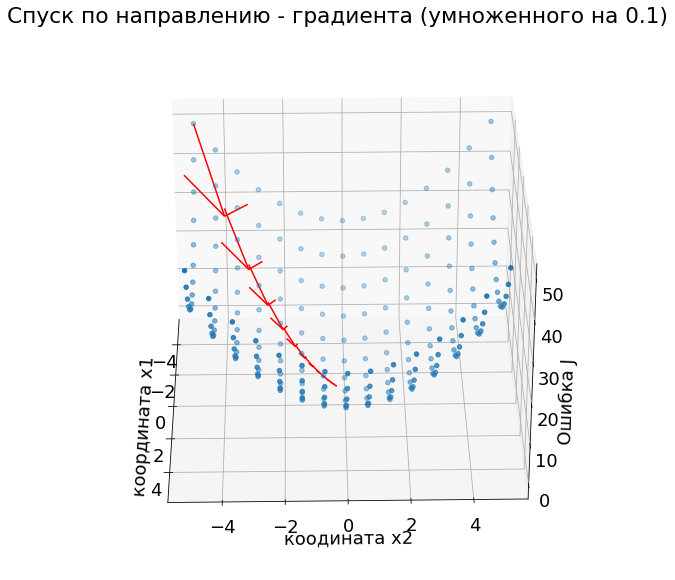

In [ ]:
# значение ошибки в каждой точке, нужно для целей визуализации (на практике нам доступны только значение функции, зависящей от реальных ответов и прогноза алгоритма)

# создаем сетку размера 15 на 15, по х1 и х2 от -5 до 5
# для каждого значения сетки находим значение функции
dots = 15 # количество
x1 = np.array([np.linspace(-5, 5, dots) for i in range(dots)]).flatten()
x2 = np.array([np.full((dots, 1), i) for i in np.linspace(5, -5, dots)]).flatten()

y = np.array(list(map(w1_sq_plus_w_2_sq, x1, x2)))

alpha = 0.1

w1_pos = []
w2_pos = []
f_x1_x2 = []
error = []

w1 = -5
w2 = -5

w1_pos.append(w1)
w2_pos.append(w2)
f_x1_x2.append(w1_sq_plus_w_2_sq(w1, w2))

grad_w1_history = []
grad_w2_history = []

grad = grad_w1_sq_plus_w_2_sq(w1, w2)
grad_w1 = grad[0]
grad_w2 = grad[1]

grad_w1_history.append(grad_w1)
grad_w2_history.append(grad_w2)
error.append(w1_sq_plus_w_2_sq(grad_w1, grad_w2))

for angle in range(0,360):
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('Спуск по направлению - градиента (умноженного на 0.1)')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.set_zlabel('Ошибка J')
    ax.scatter(x1, x2, y)

    ax.quiver( # строим вектор (3 координаты начала и 3 координаты конца)
              w1_pos, w2_pos, f_x1_x2, # изначальная позиция (x1, x2, f(x1, x2))
              grad_w1_history, grad_w2_history, error, # конечная позиция (компонента градиента по х1, по х2, f(град_функции в точке - две компоненты до) )
              color='r', length = -0.1)

    # это условие нужно только для целей визуализации, чтоб показать шаги
    if angle%30==0:
        # делаем шаг по минус градиенту т.е. добавляем к х последний минус градиент, умножаем на скорость спуска
        w1 -= alpha * grad_w1_history[-1]
        w2 -= alpha * grad_w2_history[-1]
        # сохраняем позиции
        w1_pos.append(w1)
        w2_pos.append(w2)
        # находим значения в этих позициях
        f_x1_x2.append(w1_sq_plus_w_2_sq(w1_pos[-1], w2_pos[-1]))
        # находим новое направление градиента по каждому нарпавлению
        grad = grad_w1_sq_plus_w_2_sq(w1_pos[-1], w2_pos[-1])
        grad_w1 = grad[0]
        grad_w2 = grad[1]
        # сохраняем в историю с минусом
        grad_w1_history.append(grad_w1)
        grad_w2_history.append(grad_w2)
        # сохраняем ошибку
        error.append(w1_sq_plus_w_2_sq(grad_w1, grad_w2))

    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

# Реальные данные

Во всех примерах до этого мы рассматривали ситуацию, когда напрямую известно как выглядит зависимость входов от выходов ($J(w) = w^2$)

На практике такая зависимость неизвестна. Единственное, что мы знаем, что у нас есть некоторые данные, обладающие зависимостями с целевой переменной, которые наша модель может найти.

Для этого нам необходим функционал, который бы показывал ошибку нашего алгоритма и при этом было бы понятно, как изменяя параметры алгоритма будет меняться эта ошибка (дифференцируемость).Наиболее понятным в случае задачи прогнозирования зависимости длины плавника от массы пингвина было бы построить модель, которая получает на вход длины плавников всех пингвинов и для каждого делает прогноз о его массе. На основе этого можно посмотреть на разницу между реальной ценой и предсказанной (по модулю, чтоб компенсировать отрицательную ошибку):

$$J(W) = \frac{1}{n}\sum_{i=0}^{n} |y_i - \hat{y}_i|$$

Эту функцию мы будем называть ошибкой, иные названия: потери / лосс / cost function / error / loss / error function
Где:
* J(W) - ошибка зависящая от параметров алгоритма $W = [w_0, w_1]$ в нашем простейшем случае
* $n$ - количество точек (пингвинов)
* $\hat{y}_i$ - прогноз алгоритма $y = w_0 + w_1\cdot x$ (напоминаю, y - масса пингвина, х - длина плавника) для $i$-го пенгвина
* $y_i$ - реальные ответы (массы пингвинов)

Однако модуль - не дифференцируемая функция. Иными словами будет непонятно, как изменение параметров алгоритма ($w_0$ и $w_1$ в моедли $y = w_0 + w_1\cdot x$) влияет на нашу ошибку. Простейшим решением будет взять квадрат (этому есть более сложное объяснение, которое будет рассмотрено на следующих занятиях), он легко дифференцируется и сильнее "штрафует" (квадратично) каждую точку, которая сильно отклоняется от реальных значений:

$$J(W) = \frac{1}{n}\sum_{i=0}^{n} (y_i - \hat{y}_i)^2$$

Обозначения все те же, но теперь мы можем с легкостью продифференцировать ее:

$$\frac{dJ(W)}{dw_1} = \frac{1}{n}\sum_{i=0}^{n} 2(y_i - (w_0 + w_1 \cdot x_i))(-x_i) $$

Все, что мы сделали - это подставили $w_0 + w_1 \cdot x_i$ вместо $\hat{y}_i$ и продифференцировали по $w_1$. Т.е. просто воспользовались степенным правилом:

$$\frac{dJ(W)}{dw_1} = \frac{-2}{n}\sum_{i=0}^{n} x_i(y_i - \hat{y}_i)$$

Все аналогично и для смещения $w_0$:

$$\frac{dJ(W)}{dw_0} = \frac{-2}{n}\sum_{i=0}^{n} (y_i - \hat{y}_i)$$

Теперь, если мы можем инициализировать $w_0$ и $w_1$ случайными значениями и обновлять их по направлению минус градиента:

$$w_0 = w_0 - \alpha \frac{dJ(W)}{dw_0}$$
$$w_1 = w_1 - \alpha \frac{dJ(W)}{dw_1}$$

Где $\alpha$ - скорость спуска (например 0.1, как в примерах выше)

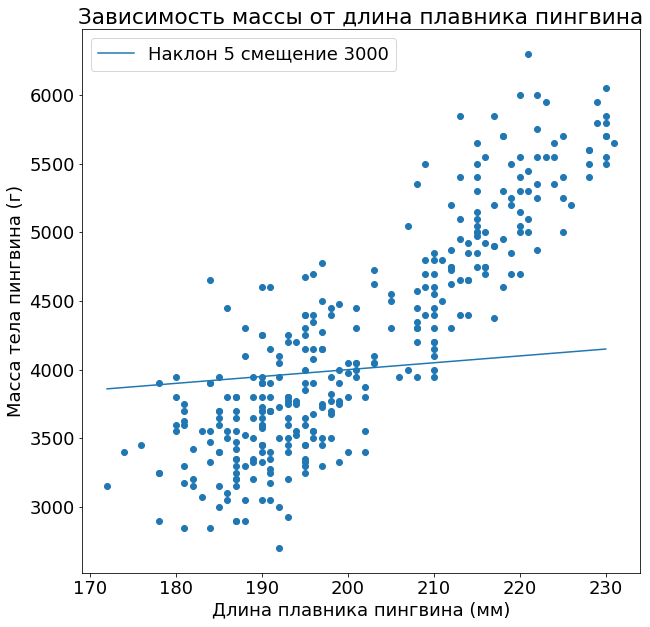

In [ ]:
# вспомним про нащи данные с пингвинами
plot_line_on_data(df['flipper_length_mm'], # длина плавника
                  df['body_mass_g'], # целевая величина
                  'Длина плавника пингвина (мм)',
                  'Масса тела пингвина (г)',
                  'Зависимость массы от длина плавника пингвина',
                  [3000, 5]) # коэффициенты наклона я прикинул на глаз, наша задача - найти их

In [ ]:
# Строим модель
w1 = 0
w0 = 0

alpha = 0.001  # скорость спуска по градиенту
epochs = 1000  # Количество интерпций прохождения по всем данным т.е. сколько раз модель "увидит" данные, спрогнозирует и исправит свои параметры в соответсвии с ошибкой

X = df['flipper_length_mm'].values # обучающая выборка
Y = df['body_mass_g'].values # масса тела

n = float(len(X)) # Число элементов в выборке

# Выполняем шаги градиентного спуска
for i in range(epochs):

    Y_pred = w1*X + w0  # Текущее предсказание вектора Y
    D_w1 = (-2/n) * sum(X * (Y - Y_pred))  # Производная функции потерь по w1
    D_w0 = (-2/n) * sum(Y - Y_pred)  # Производная функции потерь по w0
    w1 = w1 - alpha * D_w1  # Обновляем w1 по направлению минус градиента
    w0 = w0 - alpha * D_w0  # Обновляем w0 по направлению минус градиента
    if i%100==0: # будем отображать прогресс обучения каждые 100 итераций
        print(w1, w0)

print(w1, w0)

1710.6042042042043 8.414114114114115
4.250958526182079e+193 2.1050446475469217e+191
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


<ipython-input-19-95cfeb1aa36e>:17: RuntimeWarning: overflow encountered in double_scalars
  D_w1 = (-2/n) * sum(X * (Y - Y_pred))  # Производная функции потерь по w1
<ipython-input-19-95cfeb1aa36e>:19: RuntimeWarning: invalid value encountered in double_scalars
  w1 = w1 - alpha * D_w1  # Обновляем w1 по направлению минус градиента


Что произошло? Посмотрим на абсолютные значения массы и длины плавника. Производная очень чувствительна к масштабу, из-за чего наши шаги стали так резко менять параметры алгоритма. Как следствие параметры алгоритма либо уйдут на бесконечность либо на 0.

По этой причине входные данные надо предварительно нормализовать (предпочтительно - стандартизация). Так мы устраним влияние масштаба признаков и стабилизируем спуск по минус градиенту.

$$x_{i, j} = \frac{x_{i,j} - \mu_j}{\sigma_j}$$

Где:
* $j$ - номер столбца (признака)
* $i$ - номер строки (точки данных)
* $x_{i, j}$ - значение данных в строке $i$ столбца $j$
* $\mu_j$ - среднее (матожидание) значение в признаке $j$
* $\sigma_j$ - стандартное отклонение в признаке $j$

Иными словами мы переносим середину распределения в 0 и сжимаем его так, чтоб стандартное отклонение было = 1 (как и дисперсия), что позитивно скажется на амплитуду разброса.

In [ ]:
X = (X - X.mean())/X.std()

(array([ 3., 20., 51., 77., 44., 15., 42., 38., 28., 15.]),
 array([-2.06985195, -1.64826392, -1.22667589, -0.80508786, -0.38349983,
         0.03808819,  0.45967622,  0.88126425,  1.30285228,  1.72444031,
         2.14602834]),
 <BarContainer object of 10 artists>)

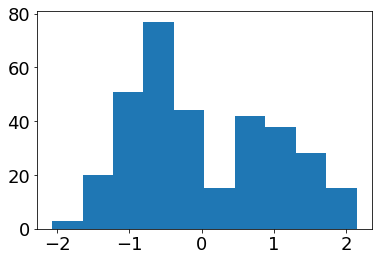

In [ ]:
plt.hist(X)

In [ ]:
# Строим модель
w1 = 0
w0 = 0

alpha = 0.01  # скорость спуска по градиенту
epochs = 1000  # Количество интерпций прохождения по всем данным т.е. сколько раз модель "увидит" данные, спрогнозирует и исправит свои параметры в соответсвии с ошибкой

error_train = [] # история изменения MSE в течении итераций на треине
error_test = [] # история изменения MSE в течении итераций на тесте

X = df['flipper_length_mm'].values # обучающая выборка
X = (X - X.mean())/X.std() # процесс стандартизаци
Y = df['body_mass_g'].values # масса тела

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

n = float(len(X)) # Число элементов в выборке

for i in range(epochs):

    Y_pred = w1*X_train + w0  # Текущее предсказание вектора Y
    D_w1 = (-2/n) * sum(X_train * (y_train - Y_pred))  # Производная функции потерь по w1
    D_w0 = (-2/n) * sum(y_train - Y_pred)  # Производная функции потерь по w0
    w1 = w1 - alpha * D_w1  # Обновляем w1 по направлению минус градиента
    w0 = w0 - alpha * D_w0  # Обновляем w0 по направлению минус градиента

    Y_pred_test = w1*X_test + w0

    error_train.append( ((y_train - Y_pred)**2).mean() )
    error_test.append( ((y_test - Y_pred_test)**2).mean() )
    if i%100==0: # будем отображать прогресс обучения каждые 100 итераций
        print(w1, w0)

print(w1, w0)

8.172682241943328 66.83033033033033
500.66317362779694 3372.2754806485173
648.3863902980721 4040.64090229774
688.3869011796733 4176.427337688082
698.6154981651594 4204.147197300759
701.1376799810876 4209.833525613632
701.7442806206966 4211.00564761478
701.8875648457763 4211.248413311479
701.920955013335 4211.2989294314675
701.9286552967499 4211.309488800282
701.9304088188511 4211.311696349247


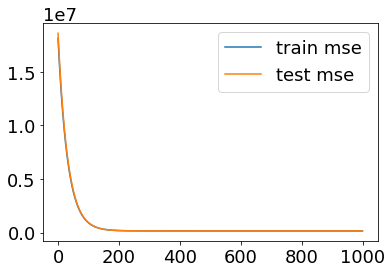

In [ ]:
plt.plot(error_train, label='train mse')
plt.plot(error_test, label='test mse')
plt.legend()
plt.show()

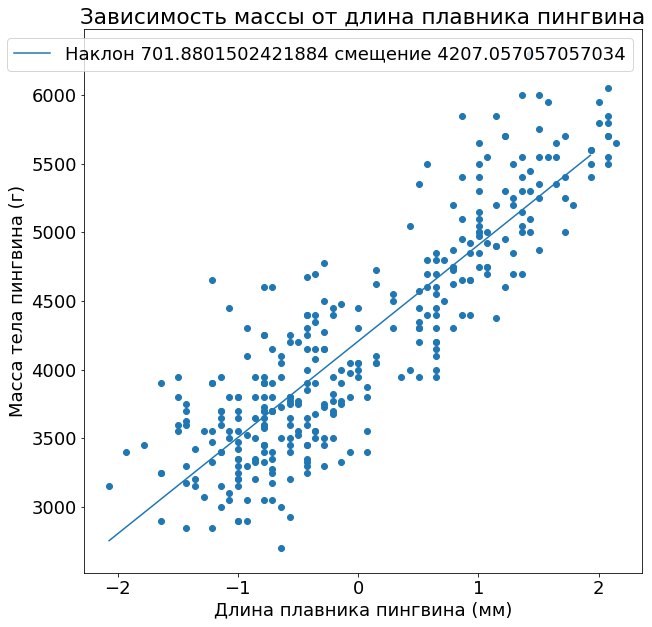

In [ ]:
# вспомним про нащи данные с пингвинами
plot_line_on_data(X, # длина плавника
                  df['body_mass_g'], # целевая величина
                  'Длина плавника пингвина (мм)',
                  'Масса тела пингвина (г)',
                  'Зависимость массы от длина плавника пингвина',
                  [w0, w1]) # коэффициенты наклона я прикинул на глаз, наша задача - найти их

Да, таким образом входные значения больше нельзя называть длиной плавника, поскольку они были стандартизованы. Но зато теперь любую точку данных (длину плавника) можно преобразовать с известным $\mu_j$ $\sigma_j$, подать на модель и получить неплохой прогноз.